# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

Text(0.5,1,'Correlation between BPXDI1 and BPXDI2')

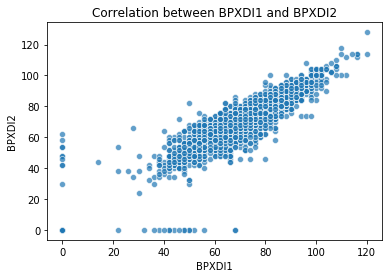

In [3]:
sns.scatterplot("BPXDI1", "BPXDI2", data=da, alpha=0.7).set_title("Correlation between BPXDI1 and BPXDI2")

In [4]:
corr = da[["BPXDI1", "BPXDI2", "BPXSY1", "BPXSY2"]].corr()
corr

,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.316531,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.303847
BPXSY1,0.316531,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.303847,0.962287,1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

There is a weak positive correlation between the measurements of systolic blood pressure with the of the dialostic one

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

No, they aren't

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

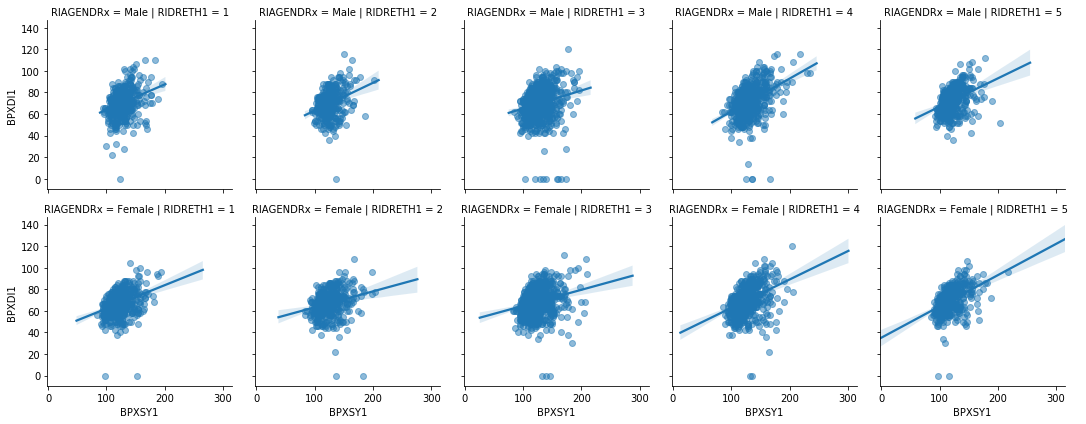

In [5]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(sns.regplot, "BPXSY1", "BPXDI1", scatter_kws={"alpha": 0.5}).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

Almost all have the same correlation, a positive weak one. But for example, Males belonging to the ETH 4, maybe have a little stronger correlation than others. And 

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

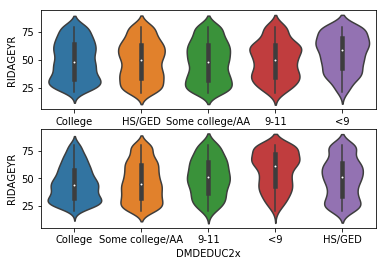

In [6]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
vio = da.drop(da[da.DMDEDUC2x == "Don't know"].index)[["RIAGENDRx", "RIDAGEYR", "DMDEDUC2x"]]
vio_males = vio[vio["RIAGENDRx"] == "Male"]
vio_females = vio[vio["RIAGENDRx"] == "Female"]

fig, (ax1, ax2) = plt.subplots(2,1)
sns.violinplot(vio_males.DMDEDUC2x, vio_males.RIDAGEYR, ax=ax1)
sns.violinplot(vio_females.DMDEDUC2x, vio_females.RIDAGEYR, ax=ax2)


__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


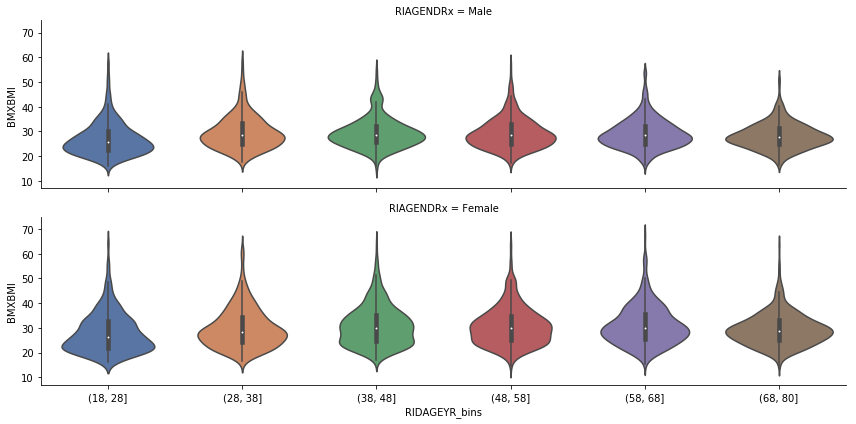

In [31]:
da["RIDAGEYR_bins"] = pd.cut(da.RIDAGEYR, [18,28,38,48,58,68,80])
sns.FacetGrid(da, row="RIAGENDRx", aspect=4).map(sns.violinplot,"RIDAGEYR_bins", "BMXBMI", palette="deep")

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [48]:
da[["HIQ210", "RIDRETH1"]].groupby(["HIQ210", "RIDRETH1"]).size().unstack().fillna(0).apply(lambda x: x/x.sum())

RIDRETH1,1,2,3,4,5
HIQ210,,,,,
1.0,0.137982,0.128696,0.067354,0.108654,0.081761
2.0,0.857567,0.871304,0.931432,0.890385,0.915723
9.0,0.004451,0.000000,0.001214,0.000962,0.002516
